In [1]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\subhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv(r"C:\Users\subhi\OneDrive\Desktop\dataset\finaltrain.csv")

In [3]:
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet,#
0,0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,2,3,0,bihday your majesty,bihday your majesty,NaN
3,3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [4]:
#cropping columns
dff = df.iloc[:,[2,4]]

In [5]:
dff.head()

,label,clean_tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for #lyft credit i can't use cause they...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ur...
4,0,factsguide: society now #motivation


In [6]:
def Hashtags(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

<AxesSubplot:xlabel='Hashtags', ylabel='Values'>

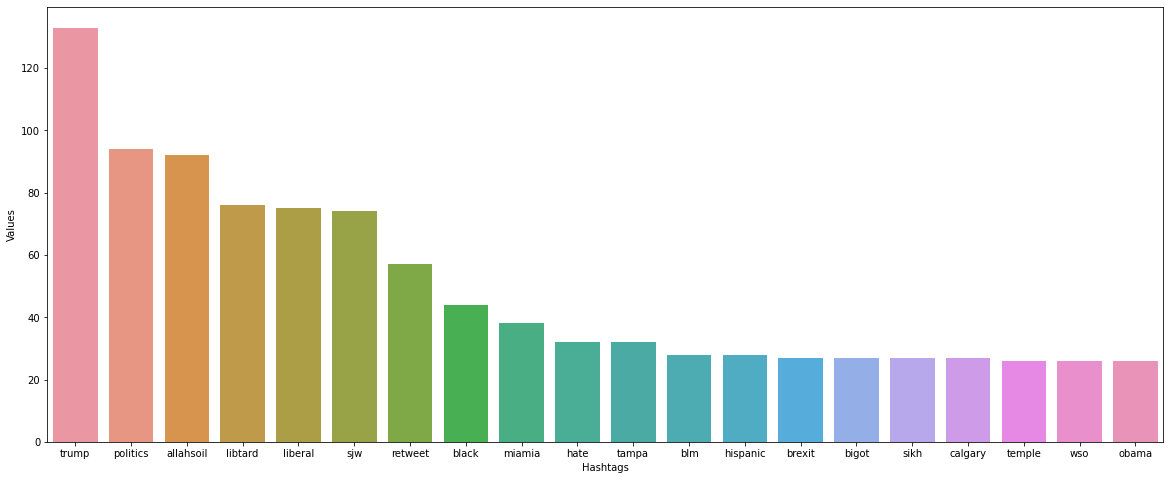

In [7]:
neg_hashtags=Hashtags(dff['clean_tweet'][dff['label']==1])
freq=nltk.FreqDist(sum(neg_hashtags,[]))
hashtags=pd.DataFrame({'Hashtags':list(freq.keys()),'Values':list(freq.values())})
hashtags=hashtags.nlargest(columns="Values",n=20)
plt.figure(figsize=(20,8))
sb.barplot(data=hashtags,x="Hashtags",y="Values")

In [8]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [9]:
X_temp['label'] = y_temp

In [10]:
#positive tweets
nonhate = X_temp[X_temp['label'] == 0]
nonhate.head()

,label,clean_tweet
15828,0,happiness is a sunset and a pile of shells. #s...
28373,0,i hate when u say me ur feelings #me#follow#fo...
21712,0,creating some new playlists and enjoying a bea...
17130,0,it's incredible that they censor films. it's s...
30517,0,"now playing : david lanz - "" cristofori's drea..."


In [11]:
#negative tweets
hate = X_temp[X_temp.label == 1]
nonhatesample = nonhate.sample(n = hate.shape[0])
nonhatesample.head()

,label,clean_tweet
15807,0,it's opening night of the show #lostinthemuseu...
26111,0,i love you bgt bun dddddddd girl family #lucky...
8085,0,cookies. protein. fun! #lennyandlarrys #comple...
9884,0,"sometimes i forget how lucky i am to see, hear..."
2314,0,i am reassuring. #i_am #positive #affirmation


In [12]:
#combining hate and non hate tweets of train data
ds = pd.concat([hate, nonhatesample], axis = 0)
ds.tail()

,label,clean_tweet
31958,0,to see nina turner on the airwaves trying to w...
9700,0,d...wishing a very bihday #hbd #bihday d d d d...
4509,0,"""not able to offer any relocation packages at ..."
21604,0,skip do you type things just to get a reaction...
10413,0,how the alphabet is taught today


In [13]:
nonhatesample.shape

(2017, 2)

In [14]:
ds.to_csv(r"C:\Users\subhi\OneDrive\Desktop\dataset\train3.csv")

In [15]:
ds = pd.read_csv(r"C:\Users\subhi\OneDrive\Desktop\dataset\train3.csv")

In [16]:
ds.head()

,Unnamed: 0,label,clean_tweet
0,6074,1,never be content to sit back and watch as othe...
1,16237,1,this stupid idea that #trump is a fascist and ...
2,20419,1,just learned that there're men who find breast...
3,8170,1,this is a completely justified call out on my ...
4,1717,1,you might be a libtard if... #libtard #sjw #li...


In [17]:
ds_temp = ds
testdf = X_test
testdf['label'] = y_test
ds = pd.concat([ds_temp, testdf], axis = 0)
ds.head()

,Unnamed: 0,label,clean_tweet
0,6074.0,1,never be content to sit back and watch as othe...
1,16237.0,1,this stupid idea that #trump is a fascist and ...
2,20419.0,1,just learned that there're men who find breast...
3,8170.0,1,this is a completely justified call out on my ...
4,1717.0,1,you might be a libtard if... #libtard #sjw #li...


In [18]:
ds.shape

(7231, 3)

In [19]:
testdf.head()

,label,clean_tweet
3893,0,ua tanks #underarmourwomen #fit #healthy decid...
29766,0,i am thankful for freedom of speech. #thankful...
26222,0,bridge over trouble water. #mtbswedenmagazine ...
12218,0,thank you for this! #surprised #igers #igpops ...
1495,0,when it feels like a friday but it's really th...


In [20]:
col_name="clean_tweet"
first_col = testdf.pop(col_name)

In [21]:
testdf.head()

,label
3893,0
29766,0
26222,0
12218,0
1495,0


In [22]:
testdf.insert(0,col_name,first_col)
testdf.head()

,clean_tweet,label
3893,ua tanks #underarmourwomen #fit #healthy decid...,0
29766,i am thankful for freedom of speech. #thankful...,0
26222,bridge over trouble water. #mtbswedenmagazine ...,0
12218,thank you for this! #surprised #igers #igpops ...,0
1495,when it feels like a friday but it's really th...,0


In [23]:
list(testdf.index)

[3893,
 29766,
 26222,
 12218,
 1495,
 4837,
 12219,
 22198,
 5853,
 13802,
 3466,
 8098,
 66,
 22877,
 4452,
 9790,
 6946,
 4357,
 22441,
 4145,
 20305,
 30642,
 3085,
 21144,
 15346,
 2402,
 15744,
 8020,
 14161,
 4725,
 60,
 16321,
 1602,
 29219,
 14144,
 2955,
 30536,
 9365,
 27205,
 22207,
 24431,
 660,
 17376,
 26912,
 6116,
 14764,
 30447,
 10792,
 1593,
 10626,
 4668,
 19887,
 29553,
 26059,
 29667,
 12183,
 22305,
 8005,
 15777,
 15026,
 27306,
 12528,
 22967,
 21140,
 17433,
 26908,
 14167,
 23707,
 16242,
 15483,
 13513,
 30095,
 5524,
 19694,
 3012,
 16851,
 12728,
 8728,
 1237,
 11321,
 624,
 30949,
 21784,
 10396,
 30959,
 3607,
 22636,
 29372,
 13776,
 8814,
 10728,
 7510,
 18973,
 18074,
 17414,
 3744,
 8744,
 6515,
 21202,
 16550,
 14117,
 1548,
 15691,
 2405,
 11691,
 14330,
 29685,
 22716,
 15773,
 6255,
 25274,
 2778,
 7862,
 5130,
 4547,
 3716,
 23381,
 17722,
 10561,
 7327,
 31912,
 29114,
 28098,
 834,
 8184,
 22771,
 24140,
 23217,
 16457,
 2311,
 27563,
 26374,

In [24]:

Corpus_list = testdf["clean_tweet"].tolist()

In [25]:
corpus=[]
def convert(Corpus_list):
    return ([i for item in Corpus_list for i in item.split()])
corpus=convert(Corpus_list)

In [26]:
Corpus_list

['ua tanks #underarmourwomen #fit #healthy decide...commit...succeed!a|',
 'i am thankful for freedom of speech. #thankful #positive',
 'bridge over trouble water. #mtbswedenmagazine #mtb #mountainbikes #fun a|',
 'thank you for this! #surprised #igers #igpops #iphonepic #iphoneonly #iphonegraphya|',
 "when it feels like a friday but it's really thursday ..",
 "you too!! father's day!! #larry bakman",
 'happy at work conference: rig.ht mindset leads to culture-of-development organizations #work #mindset',
 "someone's delighted with life out at the park #noraintoday",
 'yes so true! always be in the #rain!',
 'real girls posting nude pics of themselves hardcore music',
 "tweeted the exact same thing 10 mins ago. i can't stand she is such a nasty bitch &amp; so false looking!!",
 'tomorrowa| #queens10k #fitmom #firstmarathon #nyrr #runforlife (at brooklyn, new york)',
 "i celebrate every man that has played it's fatherly role. father's day#",
 'one year to go until i marry the beautiful 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
#counting the words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Corpus_list)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

,00,000,01,05,06,064,07,09053111156,0shares,10,...,zombie,zomg,zone,zoo,zoologist,zoomies,zoro,zpamdelacruz,zucchini,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df2.columns

Index(['00', '000', '01', '05', '06', '064', '07', '09053111156', '0shares',
       '10',
       ...
       'zombie', 'zomg', 'zone', 'zoo', 'zoologist', 'zoomies', 'zoro',
       'zpamdelacruz', 'zucchini', 'zzz'],
      dtype='object', length=9158)

In [30]:
df3 = df2.filter(regex='^\D')

In [31]:
df3 = df3[df3.columns.drop(list(df.filter(regex='a^D')))]

In [32]:
df3

,____________________________________,_animaladvocate,_ii,a1a,a1aa,a1i,a2aaaaa,a2s4,a3,a3pa,...,zombie,zomg,zone,zoo,zoologist,zoomies,zoro,zpamdelacruz,zucchini,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
tdf = df3
tdf['labelxyz'] = list(testdf.label)

In [34]:
tdf.tail()

,____________________________________,_animaladvocate,_ii,a1a,a1aa,a1i,a2aaaaa,a2s4,a3,a3pa,...,zomg,zone,zoo,zoologist,zoomies,zoro,zpamdelacruz,zucchini,zzz,labelxyz
3192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [35]:
tdf_hate = tdf[tdf.labelxyz == 1]
tdf_nonhate = tdf[tdf.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)#dropping the index to check algo
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)

X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)

y_test = list(X_test_df.labelxyz)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, list(testdf.label), test_size=0.2)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [38]:
# Use Cross-validation to find accuracy
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [39]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,1.0
1,Naives Bayes,1.0


Both algorithm classifies the test data properly and has accuracy of 100%

In [40]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
accuracy_score(y_test, predict_nav)

1.0

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[598,   0],
       [  0,  42]], dtype=int64)

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

1.0

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_log)

array([[598,   0],
       [  0,  42]], dtype=int64)

In [44]:
log_reg.fit(X_train, y_train)
#predict_log = log_reg.predict(X_test, threshold = 0.4)
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
#accuracy_score(y_test, predict_log)

In [45]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

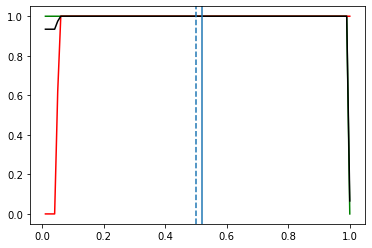

In [46]:
import matplotlib.pyplot as plt
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.52)
plt.axvline(0.5, linestyle='dashed')

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))

Logistic Regression Score:  0.5
Naive Bayes Score:  1.0


In [48]:
words = []
for k in range(len(corpus)):
    tweet_k = corpus[k].split(" ")
    for m in range(len(tweet_k)):
        words.append(tweet_k[m])
from collections import Counter
counter_obj = Counter(words)
top100 = counter_obj.most_common(1000)
top100words = []
for i in range(len(top100)):
    top100words.append(top100[i][0])

In [49]:
tdftop = df3
lst3 = [value for value in list(tdftop.columns) if value in top100words] 
tdf100 = tdftop[lst3]
tdf100['labelxyz'] = list(testdf.label)
tdf_hate = tdf100[tdf100.labelxyz == 1]
tdf_nonhate = tdf100[tdf100.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
log_reg =  LogisticRegression()

log_reg.fit(X_train, y_train)
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

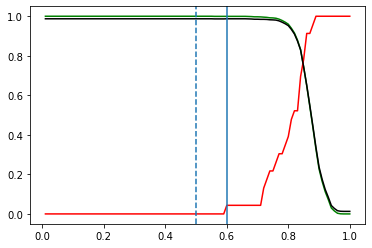

In [51]:
import matplotlib.pyplot as plt
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [52]:
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

naive bayes
0.7678970917225951
[[1358  407]
 [   8   15]]


In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
print('Logistic Regression')
print(accuracy_score(y_test, predict_log))
print(confusion_matrix(y_test, predict_log))

Logistic Regression
0.9871364653243848
[[1765    0]
 [  23    0]]


In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))

Logistic Regression Score:  0.5
Naive Bayes Score:  0.7107895060968099


In [55]:
import re
from nltk.util import ngrams
unigramList = []
for i in range(testdf.shape[0]):
    s = testdf.iloc[i][0]
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, 1))
    unigramList.append(output)

In [56]:
actualUnigramList = []
for i in range(len(unigramList)):
    for j in range(len(unigramList[i])):
        actualUnigramList.append(" ".join(unigramList[i][j]))
    #actualBigramList.append(temp)

In [57]:
uniqueUnigramList = [] 
[uniqueUnigramList.append(x) for x in actualUnigramList if x not in uniqueUnigramList] 
uniqueUnigramList

['ua',
 'tanks',
 'underarmourwomen',
 'fit',
 'healthy',
 'decide',
 'commit',
 'succeed',
 'a',
 'i',
 'am',
 'thankful',
 'for',
 'freedom',
 'of',
 'speech',
 'positive',
 'bridge',
 'over',
 'trouble',
 'water',
 'mtbswedenmagazine',
 'mtb',
 'mountainbikes',
 'fun',
 'thank',
 'you',
 'this',
 'surprised',
 'igers',
 'igpops',
 'iphonepic',
 'iphoneonly',
 'iphonegraphya',
 'when',
 'it',
 'feels',
 'like',
 'friday',
 'but',
 's',
 'really',
 'thursday',
 'too',
 'father',
 'day',
 'larry',
 'bakman',
 'happy',
 'at',
 'work',
 'conference',
 'rig',
 'ht',
 'mindset',
 'leads',
 'to',
 'culture',
 'development',
 'organizations',
 'someone',
 'delighted',
 'with',
 'life',
 'out',
 'the',
 'park',
 'noraintoday',
 'yes',
 'so',
 'true',
 'always',
 'be',
 'in',
 'rain',
 'real',
 'girls',
 'posting',
 'nude',
 'pics',
 'themselves',
 'hardcore',
 'music',
 'tweeted',
 'exact',
 'same',
 'thing',
 '10',
 'mins',
 'ago',
 'can',
 't',
 'stand',
 'she',
 'is',
 'such',
 'nasty',
 '

In [58]:
bigramList = []
for i in range(testdf.shape[0]):
    s = testdf.iloc[i][0]
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, 2))
    bigramList.append(output)

In [59]:
actualBigramList = []
for i in range(len(bigramList)):
    #temp = []
    for j in range(len(bigramList[i])):
        actualBigramList.append(" ".join(bigramList[i][j]))
    #actualBigramList.append(temp)
        
print(actualBigramList)

['ua tanks', 'tanks underarmourwomen', 'underarmourwomen fit', 'fit healthy', 'healthy decide', 'decide commit', 'commit succeed', 'succeed a', 'i am', 'am thankful', 'thankful for', 'for freedom', 'freedom of', 'of speech', 'speech thankful', 'thankful positive', 'bridge over', 'over trouble', 'trouble water', 'water mtbswedenmagazine', 'mtbswedenmagazine mtb', 'mtb mountainbikes', 'mountainbikes fun', 'fun a', 'thank you', 'you for', 'for this', 'this surprised', 'surprised igers', 'igers igpops', 'igpops iphonepic', 'iphonepic iphoneonly', 'iphoneonly iphonegraphya', 'when it', 'it feels', 'feels like', 'like a', 'a friday', 'friday but', 'but it', 'it s', 's really', 'really thursday', 'you too', 'too father', 'father s', 's day', 'day larry', 'larry bakman', 'happy at', 'at work', 'work conference', 'conference rig', 'rig ht', 'ht mindset', 'mindset leads', 'leads to', 'to culture', 'culture of', 'of development', 'development organizations', 'organizations work', 'work mindset', 

In [60]:
uniqueBigramList = [] 
[uniqueBigramList.append(x) for x in actualBigramList if x not in uniqueBigramList] 
uniqueBigramList

['ua tanks',
 'tanks underarmourwomen',
 'underarmourwomen fit',
 'fit healthy',
 'healthy decide',
 'decide commit',
 'commit succeed',
 'succeed a',
 'i am',
 'am thankful',
 'thankful for',
 'for freedom',
 'freedom of',
 'of speech',
 'speech thankful',
 'thankful positive',
 'bridge over',
 'over trouble',
 'trouble water',
 'water mtbswedenmagazine',
 'mtbswedenmagazine mtb',
 'mtb mountainbikes',
 'mountainbikes fun',
 'fun a',
 'thank you',
 'you for',
 'for this',
 'this surprised',
 'surprised igers',
 'igers igpops',
 'igpops iphonepic',
 'iphonepic iphoneonly',
 'iphoneonly iphonegraphya',
 'when it',
 'it feels',
 'feels like',
 'like a',
 'a friday',
 'friday but',
 'but it',
 'it s',
 's really',
 'really thursday',
 'you too',
 'too father',
 'father s',
 's day',
 'day larry',
 'larry bakman',
 'happy at',
 'at work',
 'work conference',
 'conference rig',
 'rig ht',
 'ht mindset',
 'mindset leads',
 'leads to',
 'to culture',
 'culture of',
 'of development',
 'develo

In [61]:
gramList12 = uniqueUnigramList + uniqueBigramList

In [62]:
tfidf2 = TfidfVectorizer(vocabulary = uniqueBigramList, ngram_range=(1,2))

In [63]:
tfs2 = tfidf2.fit_transform(Corpus_list)

In [64]:
feature_names = tfidf2.get_feature_names()
dense = tfs2.todense()
denselist = dense.tolist()
df_bi = pd.DataFrame(denselist, columns=feature_names)
df_bi

,ua tanks,tanks underarmourwomen,underarmourwomen fit,fit healthy,healthy decide,decide commit,commit succeed,succeed a,i am,am thankful,...,me both,both but,but also,also so,daughter tomorrow,tomorrow anythingispossible,anythingispossible lifecoach,lifecoach passion,passion presence,presence purpose
0,0.377964,0.377964,0.377964,0.377964,0.377964,0.377964,0.377964,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.284123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.400937,0.400937,0.400937,0.400937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_bi, list(testdf.label), test_size=0.2)

In [66]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train2, y_train2, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train2, y_train2, cv=3)
nav_mean = nav_scores.mean()


# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [67]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.932734
1,Naives Bayes,0.728977


In [68]:
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train2, y_train2)
predict_nav = nav_clf.predict(X_test2)
accuracy_score(y_test2, predict_nav)

0.7734375

In [69]:
log_reg.fit(X_train2, y_train2)
predict_log = log_reg.predict(X_test2)
accuracy_score(y_test2, predict_log)

0.9203125